原文链接：https://www.aideeplearning.cn/k%e9%82%bb%e5%b1%85%e7%ae%97%e6%b3%95%e8%bf%9b%e8%a1%8c%e9%b8%a2%e5%b0%be%e8%8a%b1%e5%88%86%e7%b1%bb%e9%a1%b9%e7%9b%ae/

In [6]:
from sklearn.datasets import load_iris

load_iris_data = load_iris()
print('load_iris_data.data.shape:', load_iris_data.data.shape)
print('load_iris_data.data:\n', load_iris_data.data[0:5])
print('load_iris_data.feature_names:', load_iris_data.feature_names)
print('load_iris_data.target.shape:', load_iris_data.target.shape)
print('load_iris_data.target:', load_iris_data.target[0:5])
print('load_iris_data.target_names:', load_iris_data.target_names)

load_iris_data.data.shape: (150, 4)
load_iris_data.data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
load_iris_data.feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
load_iris_data.target.shape: (150,)
load_iris_data.target: [0 0 0 0 0]
load_iris_data.target_names: ['setosa' 'versicolor' 'virginica']


In [11]:
import pandas as pd

iris_data = pd.DataFrame(load_iris_data.data, columns=load_iris_data.feature_names)
iris_data['target'] = load_iris_data.target
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# 每个不同物种的描述性统计。
# 检查 3 个物种的平均花瓣长度
for t in iris_data['petal length (cm)'].unique():
    print(t)
    print(iris_data[iris_data['petal length (cm)'] == t].mean(numeric_only=True))

1.4
sepal length (cm)    4.915385
sepal width (cm)     3.353846
petal length (cm)    1.400000
petal width (cm)     0.207692
target               0.000000
dtype: float64
1.3
sepal length (cm)    4.842857
sepal width (cm)     3.228571
petal length (cm)    1.300000
petal width (cm)     0.257143
target               0.000000
dtype: float64
1.5
sepal length (cm)    5.146154
sepal width (cm)     3.569231
petal length (cm)    1.500000
petal width (cm)     0.238462
target               0.000000
dtype: float64
1.7
sepal length (cm)    5.40
sepal width (cm)     3.60
petal length (cm)    1.70
petal width (cm)     0.35
target               0.00
dtype: float64
1.6
sepal length (cm)    4.914286
sepal width (cm)     3.342857
petal length (cm)    1.600000
petal width (cm)     0.285714
target               0.000000
dtype: float64
1.1
sepal length (cm)    4.3
sepal width (cm)     3.0
petal length (cm)    1.1
petal width (cm)     0.1
target               0.0
dtype: float64
1.2
sepal length (cm)    5.4
se

## Box Plot

<Axes: xlabel='target', ylabel='petal length (cm)'>

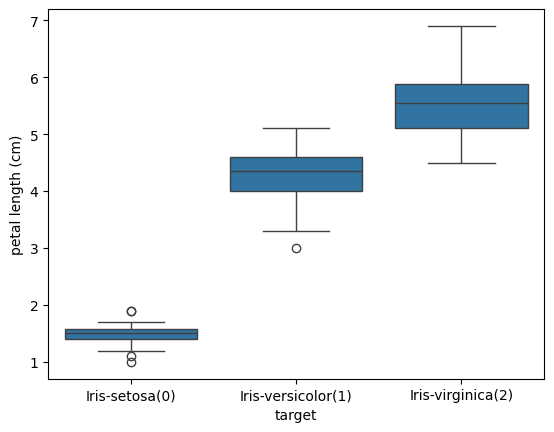

In [24]:
import seaborn as sns
# target column indicate the species, 0/1/2
iris_data_new = iris_data.replace({'target': {0: 'Iris-setosa(0)', 1: 'Iris-versicolor(1)', 2: 'Iris-virginica(2)'}})
sns.boxplot(x='target', y='petal length (cm)', data=iris_data_new)

sentosa的花瓣长度与其他两个花瓣分开。 然而，“Versicolor”和“Virgina”之间的花瓣长度是重叠的。 因此，我们可能无法单独使用“petal length (cm)”特征来区分物种。

## Violin Plot

<Axes: xlabel='target', ylabel='petal width (cm)'>

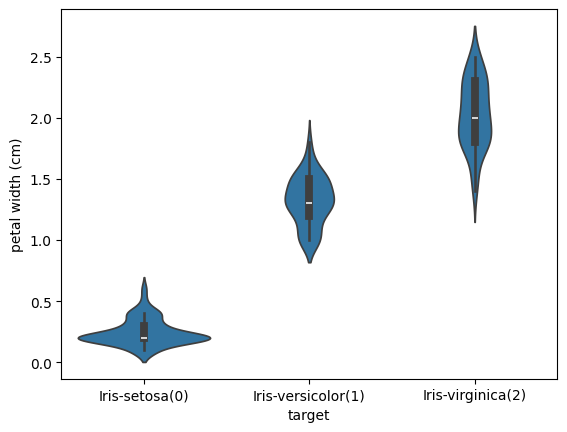

In [25]:
sns.violinplot(x='target', y='petal width (cm)', data=iris_data_new)

从上表可以看出，“setosa”的“petal width (cm)”大部分约为 0.25 厘米，“versicolor”的花瓣宽度约为 1.3 至 1.5 厘米。 对于“virginica”来说，除了 1.9 左右之外，它实际上并没有显着的分布。 正如前面提到的，PetalWidth 的 versicolor 和 virginica 之间也有很多重叠。

## Pair Plot

In [ ]:
查看数据特征如何相互交互的快速方法

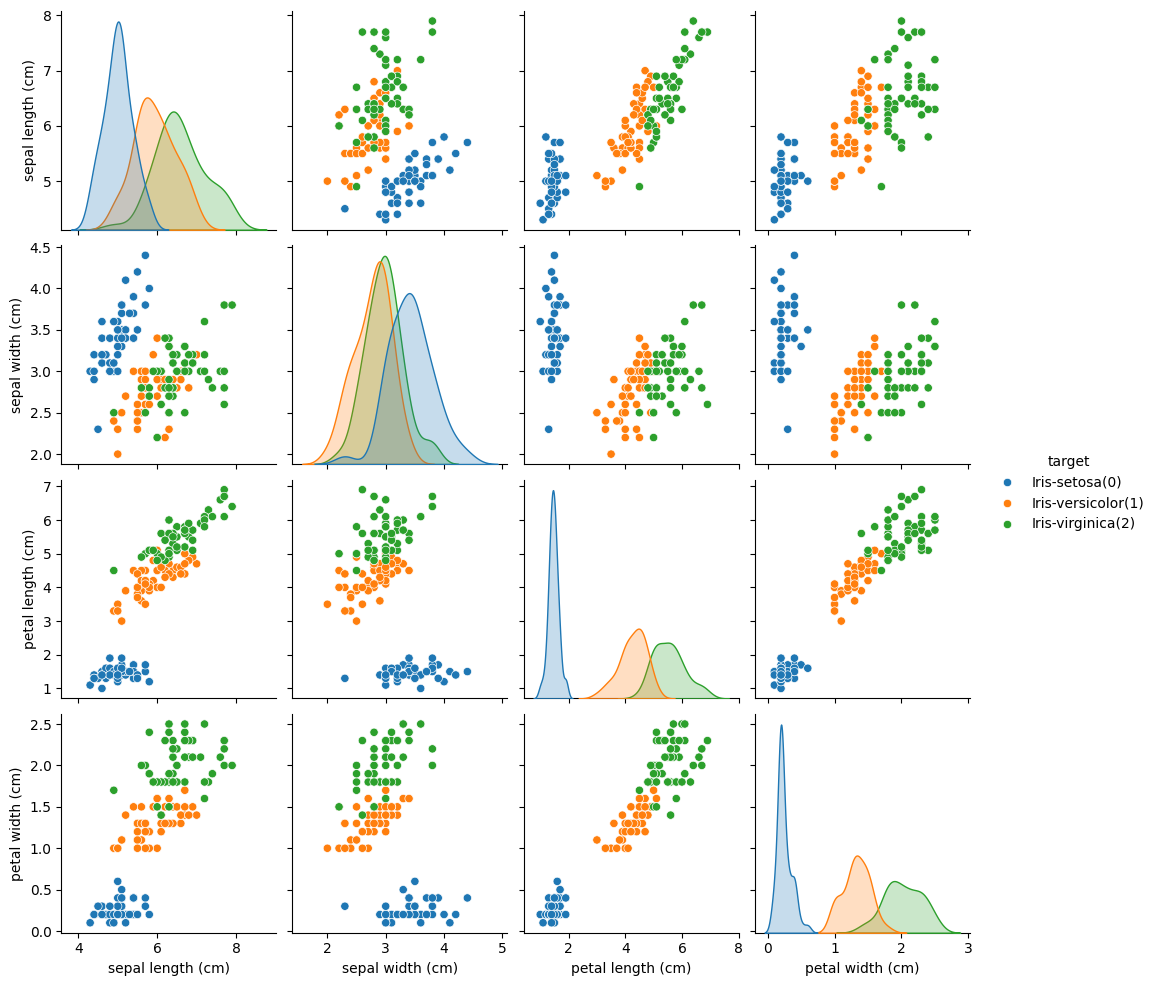

In [26]:
sns.pairplot(data=iris_data_new, hue='target')

## 训练模型

### 设置特征和标签

In [60]:
X = iris_data[['petal length (cm)', 'petal width (cm)']]
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [61]:
y = iris_data['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

## 训练KNN模型 (6 neighbors)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### 绘制决策边界

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


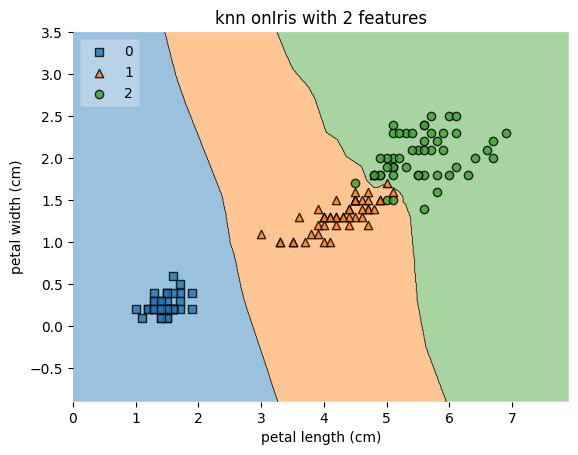

In [63]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
plot_decision_regions(np.array(X), np.array(y), clf=knn, legend=2)

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('knn onIris with 2 features')
plt.show()

# 训练KNN模型 (20 neighbors)

In [39]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


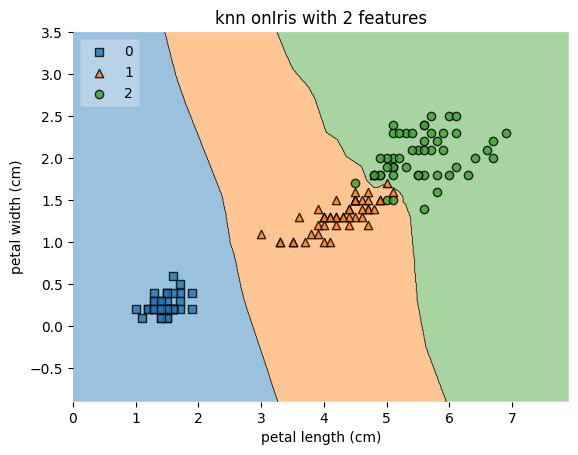

In [64]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
plot_decision_regions(np.array(X), np.array(y), clf=knn, legend=2)

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('knn onIris with 2 features')
plt.show()

## 评估模型

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

features = iris_data[['petal length (cm)', 'sepal length (cm)', 'petal width (cm)', 'sepal width (cm)']]
labels = iris_data['target']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.8, random_state=64)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

predict = knn.predict(X_test)
print('accuracy_score =', accuracy_score(predict, y_test))
print('precision_score =', precision_score(predict, y_test, average='weighted'))
print('recall_score =', recall_score(predict, y_test, average='weighted'))

print('accuracy_score =', accuracy_score(predict, y_test))
print('precision_score =', precision_score(predict, y_test, average=None))
print('recall_score =', recall_score(predict, y_test, average=None))

accuracy_score = 0.95
precision_score = 0.9531349206349208
recall_score = 0.95
accuracy_score = 0.95
precision_score = [1.         0.975      0.88095238]
recall_score = [1.         0.88636364 0.97368421]
